In [1]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Coding Project: Profiling

#### Now that you have data, use the techniques from our profiling sessions to learn more about the data set. 

## Importing the Data & Initial Data Checks

#### 1. In the code cell below, read in your data set. How many rows and how many columns of data do you have?

In [2]:
import pandas

df = pandas.read_csv("DataSets/fy2025-property-assessment-data_12_30_2024.csv", low_memory=False)
rows = df.shape[0]
cols = df.shape[1]
rows, cols
df

(183445, 66)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NUM2,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_SYSTEM,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.0,NaN,PUTNAM ST,NaN,EAST BOSTON,2128.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,3.0,A - Average,NaN
1,100002000,NaN,100002000,197.0,NaN,Lexington ST,NaN,EAST BOSTON,2128.0,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.0,NaN,0.0,A - Average,NaN
2,100003000,NaN,100003000,199.0,NaN,Lexington ST,NaN,EAST BOSTON,2128.0,1,...,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
3,100004000,NaN,100004000,201.0,NaN,Lexington ST,NaN,EAST BOSTON,2128.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
4,100005000,NaN,100005000,203.0,NaN,Lexington ST,NaN,EAST BOSTON,2128.0,1,...,N - No Remodeling,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183440,2205666000,NaN,2205666000,NaN,NaN,KNOWLES ST,NaN,BRIGHTON,2135.0,1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
183441,2205667000,NaN,2205667000,NaN,NaN,Lake ST,NaN,BRIGHTON,2135.0,1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
183442,2205668000,NaN,2205668000,4.0,NaN,Lake ST,NaN,BRIGHTON,2135.0,1,...,M - Modern,M - Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,2.0,A - Average,NaN
183443,2205669000,NaN,2205669000,2193.0,2201.0,COMMONWEALTH AV,NaN,BRIGHTON,2135.0,1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


The dataset has 183,445 rows and 66 columns.

#### 2. Check the data types for your variables. Are they all being read in correctly or are there variables that will need to be converted to the correct data type before building your models? (E.g., Are there dates being read in as "object" or are there categorical variables using number categories that are being read in as "int64"? Is there numeric data being read in as "object" because of currency symbols or commas in your raw data?)

## Summary of Data Type Issues from Initial Import of Data

* multiple object fields - st_name, unit_num, city,
* city - object -> string
* st_name - object -> string
* zip_code - number -> string
* lu - number -> string
* lu_desc - object -> string
* bldg_type - object -> string
* OWN_OCC -. object -> boolean
* owner - object -> string
* mail_street_address - object -> string
* mail_city - object -> string
* mail_state - object -> string
* mail_zip_code - object -> string
* land_sf - object -> number
* land_value - object -> currency
* bldg_value - object -> currency
* total_value - object -> currency
* gross_tax - object -> currency
* roof_structure - object -> string
* roof_cover - object -> string
* int_wall - object -> string
* ext_fni - object -> string
* int_cond - object -> string
* ext_cond - object -> string
* overall_cond - object -> string
* bdrm_cond - object -> string
* bthrm_style1 - object -> string
* bthrm_style2 - object -> string
* bthrm_style3 - object -> string
* kitchen_type - object -> string
* kitchen_style1 - object -> string
* kitchen_style2 - object -> string
* kitchen_style3 - object -> string
* heat_type - object -> string
* heat_system - object -> string
* ac_type - object -> string
* orientation - object -> string
* prop_view - object -> string
* corner_unit - object -> boolean[Double-click to type your answer here]

#### 3. Check your data for missing values. If data is missing, for which variable(s) is it missing and how much data is missing? Do you have any theories for why the data might be missing? (E.g., Is the missing data really 0's?) Keeping in mind that, when you build your models, any rows with missing data will be dropped, do you have any concerns with keeping the missing data as is? (Another way to think about this is, do you think it will be okay to lose the data in those rows for your models or will it make sense during feature engineering to impute some value for the missing data?)

[Double-click to type your answer here]

In [10]:
# Enter your code here
df.isna().sum()

case_enquiry_id                        0
open_dt                                0
sla_target_dt                      19327
closed_dt                          17309
on_time                                0
case_status                            0
closure_reason                         0
case_title                             0
subject                                0
reason                                 0
type                                   0
queue                                  0
department                             0
submitted_photo                   266210
closed_photo                      182786
location                               0
fire_district                        465
pwd_district                          66
city_council_district                  7
police_district                       61
neighborhood                         215
neighborhood_services_district        10
ward                                   3
precinct                             122
location_street_

## Profiling Numeric Data

#### 4. Get the summary statistics for your numeric variables. No explanation is necessary for this step.

In [6]:
# Enter your code here
df.describe()



,PID,CM_ID,GIS_ID,ST_NUM,ST_NUM2,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,LUC,RES_FLOOR,...,LIVING_AREA,YR_BUILT,YR_REMODEL,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,FIREPLACES,NUM_PARKING
count,1.834450e+05,9.472300e+04,1.834450e+05,174130.000000,22165.000000,183442.000000,183445.0,183445.000000,183445.000000,149989.000000,...,1.494210e+05,160778.000000,87983.000000,134824.000000,171043.000000,171180.000000,170973.000000,134748.000000,171426.000000,134989.000000
mean,1.138812e+09,9.183336e+08,1.138813e+09,226.972521,258.810738,2129.853888,1.0,1.000033,202.718564,1.981769,...,4.443069e+03,1933.777656,2002.841378,3.140791,1.375642,0.224588,1.056757,6.917030,0.268857,1.322915
std,7.094946e+08,6.903170e+08,7.094955e+08,474.772967,499.074659,30.657401,0.0,0.005719,266.618234,2.491004,...,3.826235e+04,64.158952,88.952195,2.104657,1.065191,0.461921,0.800881,4.002484,0.622966,2.401002
min,1.000010e+08,1.000100e+08,1.000010e+08,0.000000,-31.000000,2026.000000,1.0,1.000000,13.000000,0.000000,...,2.000000e+00,1700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.015470e+08,3.067310e+08,5.015480e+08,24.000000,27.000000,2119.000000,1.0,1.000000,102.000000,1.000000,...,9.420000e+02,1900.000000,1987.000000,2.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000
50%,1.102605e+09,6.026660e+08,1.102605e+09,69.000000,78.000000,2127.000000,1.0,1.000000,102.000000,2.000000,...,1.478800e+03,1920.000000,2005.000000,3.000000,1.000000,0.000000,1.000000,6.000000,0.000000,1.000000
75%,1.810466e+09,1.602331e+09,1.810466e+09,216.000000,277.000000,2131.000000,1.0,1.000000,108.000000,2.500000,...,2.587500e+03,1965.000000,2016.000000,4.000000,2.000000,0.000000,1.000000,9.000000,0.000000,2.000000
max,2.205670e+09,2.205665e+09,2.205670e+09,5341.000000,5343.000000,2467.000000,1.0,2.000000,995.000000,62.000000,...,6.982322e+06,20198.000000,20220.000000,21.000000,21.000000,7.000000,5.000000,20.000000,12.000000,210.000000


#### 5. Pick 3 key numeric variables and graph the distribution of each using the appropriate graph. No explanation is necessary for this step. (If you have fewer than 3 numeric variables in your data, only create graphs for the variables you have and only summarize for those variables in the next step.)

<Axes: ylabel='Frequency'>

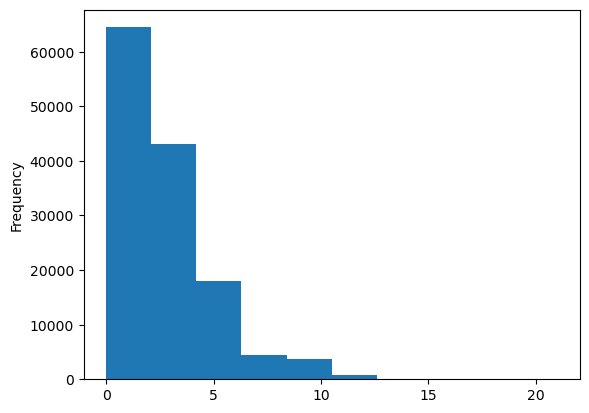

In [10]:
# Enter your code for graph #1 here
df["BED_RMS"].plot.hist()


<Axes: ylabel='Frequency'>

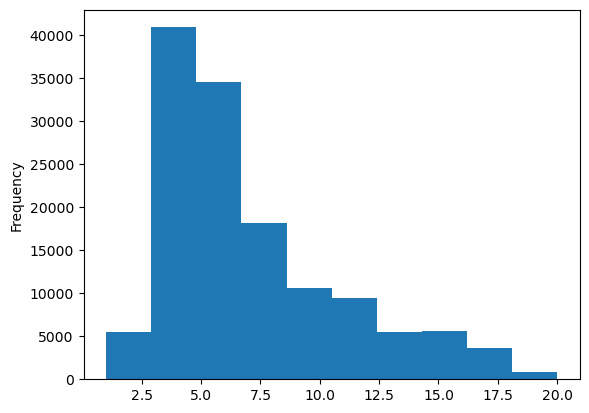

In [12]:
# Enter your code for graph #2 here
df["TT_RMS"].plot.hist()

<Axes: >

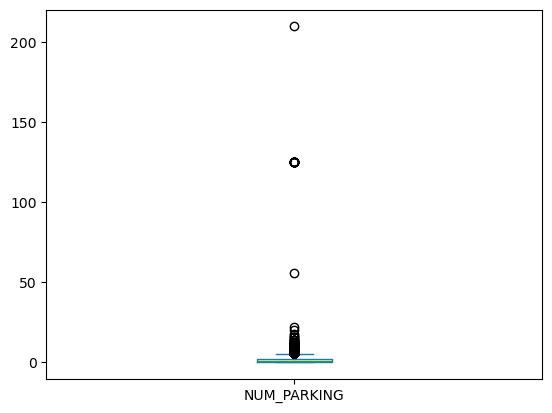

In [15]:
# Enter your code for graph #3 here
df["NUM_PARKING"].plot.box()


#### 6. Now provide a summary for each of the 3 numeric variables you graphed above. In your summaries, you should discuss the shape of the variable's distribution (e.g., is it symmetric or skewed? is it unimodal, bimodal, etc.?) Also, for each of the 3 variables, provide a measure of center (mean or median), a measure of spread (standard deviation or IQR), and discuss any potential outliers or other anomalies. 

BED_RMS is a histogram of # of bedrooms in a given property. It maxes out around 0 or 1, and tapers off steadily with each increase which seems to be intuitive knowing the Boston housing style.

TT_RMS is a histogram of total rooms in a given property. It jumps up around 3, 4, or 5 and then taperes off. I was suprised how many have > 5 rooms total but then remembered this is total rooms - bedroom, bathroom, kitchen, living room is already 4.

NUM_PARKING is a boxplot of the number of parking spots. It is heavily skewed towards the lower end of the distribution with a few outliers.

## Profiling Categorical Data

#### 7. Pick 2 key categorical variables and provide a summary: how many categories are there for each? what are the biggest categories and what % of the data falls into those main categories (including any NA's)? If you have no categorical variables in your data, provide 1-2 ideas for how you could transform some of your numeric data into categories during feature engineering.

[Double-click to type your answer here]

In [23]:
df["CITY"].value_counts()
df["CITY"].value_counts(normalize=True)
# Boston and Dorcester are the biggest categories. Boston is 26.2% of the data and Dorchester is 16.04% of the data.

df["BLDG_TYPE"].value_counts()
df["BLDG_TYPE"].value_counts(normalize=True)
# RM - Row Middle, and CL - Colonial are the biggest categories. RM is 9.85% of the data and CL is 9.31% of the data.


CITY
BOSTON              48036
DORCHESTER          29425
SOUTH BOSTON        15807
JAMAICA PLAIN       12216
BRIGHTON            12180
WEST ROXBURY        11062
EAST BOSTON         10418
ROSLINDALE           9337
HYDE PARK            9209
CHARLESTOWN          7262
ROXBURY              6186
MATTAPAN             4885
ALLSTON              4500
ROXBURY CROSSING     1869
CHESTNUT HILL        1017
BROOKLINE              24
DEDHAM                  6
READVILLE               2
NEWTON                  1
Name: count, dtype: int64

CITY
BOSTON              0.261859
DORCHESTER          0.160405
SOUTH BOSTON        0.086169
JAMAICA PLAIN       0.066593
BRIGHTON            0.066397
WEST ROXBURY        0.060302
EAST BOSTON         0.056792
ROSLINDALE          0.050899
HYDE PARK           0.050201
CHARLESTOWN         0.039587
ROXBURY             0.033722
MATTAPAN            0.026630
ALLSTON             0.024531
ROXBURY CROSSING    0.010189
CHESTNUT HILL       0.005544
BROOKLINE           0.000131
DEDHAM              0.000033
READVILLE           0.000011
NEWTON              0.000005
Name: proportion, dtype: float64

BLDG_TYPE
RM - Row Middle                 17765
CL - Colonial                   16784
LR - Low Rise                   15802
MR - Mid Rise                   15466
DK - Decker                     14621
                                ...  
366 - FIELDHOUSE/TRACK              1
382 - STABLE(S)                     1
417 - DAIRY                         1
943 - COMPUTER /SCIENCE LAB         1
436 - STUDIO /Remote Control        1
Name: count, Length: 202, dtype: int64

BLDG_TYPE
RM - Row Middle                 0.098525
CL - Colonial                   0.093084
LR - Low Rise                   0.087638
MR - Mid Rise                   0.085774
DK - Decker                     0.081088
                                  ...   
366 - FIELDHOUSE/TRACK          0.000006
382 - STABLE(S)                 0.000006
417 - DAIRY                     0.000006
943 - COMPUTER /SCIENCE LAB     0.000006
436 - STUDIO /Remote Control    0.000006
Name: proportion, Length: 202, dtype: float64

#### 8. Create a graph for each of the 2 categorical variables above to visually depict how much data falls into each category using the appropriate graph. No explanation is necessary for this step. (If you have no categorical variables in your data, you can skip this step.)

In [ ]:
# Enter your code for graph #1 here
df["CITY"].value_counts().plot.bar()


<Axes: xlabel='BLDG_TYPE'>

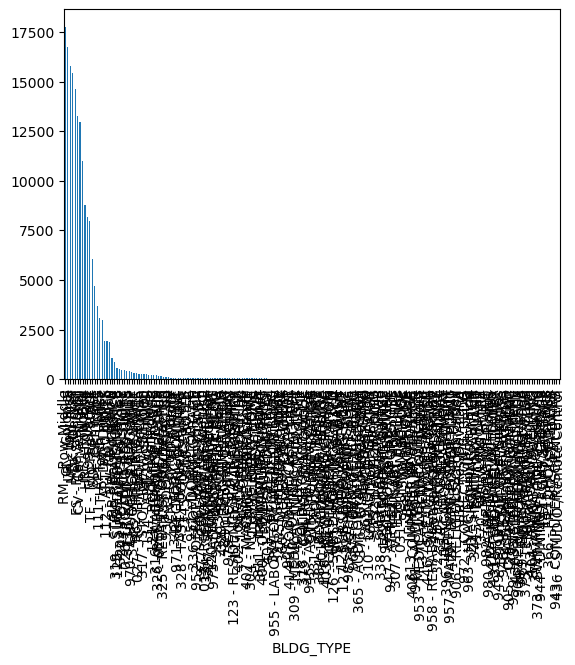

In [24]:
# Enter your code for graph #2 here
df["BLDG_TYPE"].value_counts().plot.bar()
# Surprising teh long-tail it looks like something may be funky with this data or the way it was collected

## Looking for Relationships

#### 9. What relationship(s) do you think you might want to explore when building your models? (Keep in mind that you can change your mind in the future as you continue the analysis.)

I'm interested in exploring the drivers of valuation pricing. Is it possible to find a model that can accurately predict based on age, location, size, quality or condition?


In [ ]:
#### 10. Create an appropriate graph to visually depict at least one of the relationships you discussed above. (Feel free to add additional code cells if you'd like to create more than 1 graph.)

## Once you've finished, save and export your notebook as an HTML file and upload it to the Canvas assignment.

## From the File menu, click "Save and Export Notebook As" and then select HTML. 